# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Python Files/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Python Files/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])
        # Extract date and hour from datetime
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour




        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for current_date in  df_month['date'].unique():
            # Filter data for the current date
                daily_data = df_month[df_month['date'] == current_date]


            # Iterate through each hour of the selected date
                for hour in range(24):
                # Filter data for the current hour
                    hour_data = daily_data[daily_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                    if not hour_data.empty:
                        sampled_hour_data = hour_data.sample(frac=0.05, random_state=42)


                # add data of this hour to the dataframe
                        sampled_data = pd.concat([sampled_data, sampled_hour_data])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        df.reset_index(drop=True, inplace=True)



In [9]:
for file_name in file_list:
    try:
        # Read each file
        df_month = pd.read_parquet(file_path)
        # Print or log the number of rows
        print(f"{file_name} has {len(df_month)} entries")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet has 3485185 entries
2023-10.parquet has 3485185 entries


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
if len(df) < 250000:
    print(f"Only {len(df)} rows could be generated, which indicates source data or sampling strategy needs revision.")
else:
    # Downsample to keep the total entries within your target size
    df = df.sample(n=300000, random_state=42)
# df.to_parquet('')
csv_path = '/content/drive/MyDrive/Python Files/sampled_trip_data.csv'
df.to_csv(csv_path, index=False)
print(f"CSV file saved to: {csv_path}")

CSV file saved to: /content/drive/MyDrive/Python Files/sampled_trip_data.csv


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df1 = pd.read_csv('/content/drive/MyDrive/Python Files/sampled_trip_data.csv')



In [ ]:
# df.head()
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2.0,5.53,1.0,N,158,40,1,...,0.5,8.37,6.55,1.0,50.22,2.5,0.00,2023-06-25,22,NaN
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.00,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
2,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1.0,1.54,1.0,N,140,142,1,...,0.5,3.72,0.00,1.0,22.32,2.5,0.00,2023-10-13,16,NaN
3,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1.0,1.80,1.0,N,239,75,1,...,0.5,4.60,0.00,1.0,20.00,2.5,0.00,2023-07-10,12,NaN
4,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1.0,2.61,1.0,N,186,113,1,...,0.5,4.34,0.00,1.0,26.04,2.5,0.00,2023-11-08,15,NaN


In [ ]:
# df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289746 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289746 non-null  float64
 6   store_and_fwd_flag     289746 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df1.reset_index(drop=True, inplace=True)
columns_to_drop = ['date', 'hour']
df1.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289746 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289746 non-null  float64
 6   store_and_fwd_flag     289746 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'airport_fee' in df1.columns and 'Airport_fee' in df1.columns:
    # Inspect the two columns to decide how to combine them
    # Here assuming both columns need to be summed
    df1['combined_airport_fee'] = df1['airport_fee'].fillna(0) + df1['Airport_fee'].fillna(0)

    # Drop the original columns, keeping only the combined one
    df1.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)

    # Rename the combined column
    df1.rename(columns={'combined_airport_fee': 'airport_fee'}, inplace=True)


In [ ]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2.0,5.53,1.0,N,158,40,1,30.3,1.0,0.5,8.37,6.55,1.0,50.22,2.5,0.00
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
2,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1.0,1.54,1.0,N,140,142,1,12.1,2.5,0.5,3.72,0.00,1.0,22.32,2.5,0.00
3,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1.0,1.80,1.0,N,239,75,1,11.4,2.5,0.5,4.60,0.00,1.0,20.00,2.5,0.00
4,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1.0,2.61,1.0,N,186,113,1,17.7,0.0,0.5,4.34,0.00,1.0,26.04,2.5,0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
fare_negative = (df1['fare_amount'] < 0).any()
fare_negative


np.False_

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
fare_negative = (df1['RatecodeID'] < 0).any()
fare_negative


np.False_

In [ ]:
# Find which columns have negative values
columns_with_negatives = []

for column in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column]):
        # Check for negative values
        if (df1[column] < 0).any():
            columns_with_negatives.append(column)

# Display columns with negative values
print("Columns with negative values:", columns_with_negatives)

Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [ ]:
# fix these negative values
rows_list = []

# Iterate over the DataFrame rows
for _, row in df1.iterrows():
    # Fix negative values in a copy of the row
    corrected_row = row.copy()
    for column in df1.columns:
        if pd.api.types.is_numeric_dtype(df1[column]) and corrected_row[column] < 0:
            corrected_row[column] = 0  # or use abs() for absolute values, or mean replacement

    # Add the corrected row to the list
    rows_list.append(corrected_row)

# Create a new DataFrame from the list of corrected rows
df2 = pd.DataFrame(rows_list, columns=df1.columns)


In [ ]:
columns_with_negatives = []

for column in df2.columns:
    if pd.api.types.is_numeric_dtype(df2[column]):
        # Check for negative values
        if (df2[column] < 0).any():
            columns_with_negatives.append(column)

# Display columns with negative values
print("Columns with negative values:", columns_with_negatives)
df2.head()

Columns with negative values: []


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2.0,5.53,1.0,N,158,40,1,30.3,1.0,0.5,8.37,6.55,1.0,50.22,2.5,0.00
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
2,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1.0,1.54,1.0,N,140,142,1,12.1,2.5,0.5,3.72,0.00,1.0,22.32,2.5,0.00
3,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1.0,1.80,1.0,N,239,75,1,11.4,2.5,0.5,4.60,0.00,1.0,20.00,2.5,0.00
4,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1.0,2.61,1.0,N,186,113,1,17.7,0.0,0.5,4.34,0.00,1.0,26.04,2.5,0.00


In [ ]:
df2.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,300000.000000,289746.000000,300000.000000,289746.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,289746.000000,300000.000000
mean,1.732843,1.368147,3.659629,1.632747,165.247653,164.179677,1.162633,19.824429,1.590159,0.495313,3.548984,0.596019,0.999049,28.890538,2.307849,0.138152
std,0.447047,0.889911,66.563194,7.390066,64.022393,69.829255,0.506199,18.296222,1.831790,0.048289,4.008519,2.181308,0.028566,22.843359,0.665926,0.457813
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.900000,2.500000,0.000000
max,6.000000,9.000000,26217.980000,99.000000,265.000000,265.000000,4.000000,1375.000000,13.750000,0.800000,170.000000,76.000000,1.000000,1435.190000,2.500000,1.750000


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df2.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,10254
trip_distance,0
RatecodeID,10254
store_and_fwd_flag,10254
PULocationID,0
DOLocationID,0
payment_type,0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
rows_with_nulls=df2[df2['passenger_count'].isnull()]
rows_with_nulls

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
23,2,2023-08-29 16:45:00,2023-08-29 16:57:00,NaN,1.62,NaN,NaN,142,48,0,12.47,0.0,0.5,3.29,0.00,1.0,19.76,NaN,0.0
32,1,2023-02-21 10:26:36,2023-02-21 10:45:16,NaN,2.00,NaN,NaN,143,140,0,16.30,0.0,0.5,2.03,0.00,1.0,22.33,NaN,0.0
50,1,2023-10-28 02:04:30,2023-10-28 02:25:39,NaN,0.00,NaN,NaN,48,87,0,31.66,0.0,0.5,0.00,0.00,1.0,35.66,NaN,0.0
75,2,2023-05-02 22:43:00,2023-05-02 23:07:00,NaN,8.53,NaN,NaN,161,95,0,38.83,0.0,0.5,7.41,6.55,1.0,56.79,NaN,0.0
106,2,2023-02-11 21:55:05,2023-02-11 22:05:57,NaN,0.80,NaN,NaN,164,234,0,10.69,0.0,0.5,2.94,0.00,1.0,17.63,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299857,1,2023-10-06 23:35:02,2023-10-06 23:55:02,NaN,0.00,NaN,NaN,164,114,0,21.88,0.0,0.5,0.00,0.00,1.0,25.88,NaN,0.0
299859,2,2023-05-18 16:13:13,2023-05-18 17:20:07,NaN,16.30,NaN,NaN,234,1,0,70.22,0.0,0.0,17.60,21.30,1.0,110.12,NaN,0.0
299873,2,2023-03-18 12:17:40,2023-03-18 12:42:25,NaN,9.00,NaN,NaN,24,138,0,36.52,0.0,0.5,4.46,6.55,1.0,49.03,NaN,0.0
299919,2,2023-07-09 12:46:32,2023-07-09 13:01:15,NaN,2.80,NaN,NaN,237,107,0,17.26,0.0,0.5,4.25,0.00,1.0,25.51,NaN,0.0


Did you find zeroes in passenger_count? Handle these.

In [ ]:
df2['passenger_count'].describe()

,passenger_count
count,289746.000000
mean,1.368147
std,0.889911
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [ ]:
df2['passenger_count'].fillna(value=df2['passenger_count'].mean(), inplace=True)

In [ ]:
df2['passenger_count'] = df2['passenger_count'].astype(int)
print(df2['passenger_count'].dtypes)
df2.tail(10)

int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
299990,1,2023-11-04 20:05:44,2023-11-04 20:21:00,2,2.10,1.0,N,236,161,1,15.6,2.5,0.5,3.90,0.00,1.0,23.50,2.5,0.00
299991,2,2023-11-14 05:23:58,2023-11-14 05:27:38,1,0.94,1.0,N,186,230,1,6.5,1.0,0.5,2.30,0.00,1.0,13.80,2.5,0.00
299992,1,2023-07-10 08:52:39,2023-07-10 09:12:52,1,2.90,1.0,N,114,162,1,18.4,2.5,0.5,4.48,0.00,1.0,26.88,2.5,0.00
299993,2,2023-02-21 18:43:36,2023-02-21 19:06:50,1,10.46,1.0,N,138,237,1,42.2,7.5,0.5,6.15,6.55,1.0,67.65,2.5,1.25
299994,2,2023-05-31 10:50:51,2023-05-31 11:16:01,1,1.82,1.0,N,229,263,1,21.2,0.0,0.5,5.04,0.00,1.0,30.24,2.5,0.00
299995,2,2023-06-23 13:21:45,2023-06-23 13:36:03,1,1.00,1.0,N,246,48,1,13.5,0.0,0.5,4.00,0.00,1.0,21.50,2.5,0.00
299996,2,2023-12-05 19:59:07,2023-12-05 20:05:47,1,1.28,1.0,N,68,246,1,9.3,2.5,0.5,2.00,0.00,1.0,17.80,2.5,0.00
299997,2,2023-03-16 09:09:10,2023-03-16 09:25:03,2,2.69,1.0,N,237,234,2,17.0,0.0,0.5,0.00,0.00,1.0,21.00,2.5,0.00
299998,2,2023-06-04 17:53:29,2023-06-04 18:07:31,1,2.46,1.0,N,229,263,1,15.6,0.0,0.5,5.00,0.00,1.0,24.60,2.5,0.00
299999,2,2023-01-31 10:04:40,2023-01-31 10:11:38,1,0.63,1.0,N,164,161,1,7.9,0.0,0.5,2.38,0.00,1.0,14.28,2.5,0.00


In [ ]:
df2['passenger_count'].describe()

,passenger_count
count,300000.000000
mean,1.355563
std,0.877124
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [ ]:
df2['passenger_count'].median()

1.0

In [ ]:
df2['passenger_count'] = df2['passenger_count'].replace(0, 1)

In [ ]:
df2['passenger_count'] = df2['passenger_count'].astype(int)
print(df2['passenger_count'].dtypes)
df2.tail(10)

int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
299990,1,2023-11-04 20:05:44,2023-11-04 20:21:00,2,2.10,1.0,N,236,161,1,15.6,2.5,0.5,3.90,0.00,1.0,23.50,2.5,0.00
299991,2,2023-11-14 05:23:58,2023-11-14 05:27:38,1,0.94,1.0,N,186,230,1,6.5,1.0,0.5,2.30,0.00,1.0,13.80,2.5,0.00
299992,1,2023-07-10 08:52:39,2023-07-10 09:12:52,1,2.90,1.0,N,114,162,1,18.4,2.5,0.5,4.48,0.00,1.0,26.88,2.5,0.00
299993,2,2023-02-21 18:43:36,2023-02-21 19:06:50,1,10.46,1.0,N,138,237,1,42.2,7.5,0.5,6.15,6.55,1.0,67.65,2.5,1.25
299994,2,2023-05-31 10:50:51,2023-05-31 11:16:01,1,1.82,1.0,N,229,263,1,21.2,0.0,0.5,5.04,0.00,1.0,30.24,2.5,0.00
299995,2,2023-06-23 13:21:45,2023-06-23 13:36:03,1,1.00,1.0,N,246,48,1,13.5,0.0,0.5,4.00,0.00,1.0,21.50,2.5,0.00
299996,2,2023-12-05 19:59:07,2023-12-05 20:05:47,1,1.28,1.0,N,68,246,1,9.3,2.5,0.5,2.00,0.00,1.0,17.80,2.5,0.00
299997,2,2023-03-16 09:09:10,2023-03-16 09:25:03,2,2.69,1.0,N,237,234,2,17.0,0.0,0.5,0.00,0.00,1.0,21.00,2.5,0.00
299998,2,2023-06-04 17:53:29,2023-06-04 18:07:31,1,2.46,1.0,N,229,263,1,15.6,0.0,0.5,5.00,0.00,1.0,24.60,2.5,0.00
299999,2,2023-01-31 10:04:40,2023-01-31 10:11:38,1,0.63,1.0,N,164,161,1,7.9,0.0,0.5,2.38,0.00,1.0,14.28,2.5,0.00


In [ ]:
df2['passenger_count'].info()

<class 'pandas.core.series.Series'>
Index: 300000 entries, 0 to 299999
Series name: passenger_count
Non-Null Count   Dtype
--------------   -----
300000 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [ ]:
df2.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2,5.53,1.0,N,158,40,1,30.3,1.0,0.5,8.37,6.55,1.0,50.22,2.5,0.00
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1,18.11,2.0,N,132,107,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
2,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1,1.54,1.0,N,140,142,1,12.1,2.5,0.5,3.72,0.00,1.0,22.32,2.5,0.00
3,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1,1.80,1.0,N,239,75,1,11.4,2.5,0.5,4.60,0.00,1.0,20.00,2.5,0.00
4,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1,2.61,1.0,N,186,113,1,17.7,0.0,0.5,4.34,0.00,1.0,26.04,2.5,0.00
5,1,2023-04-26 23:46:30,2023-04-26 23:48:04,1,0.60,1.0,N,141,141,2,5.1,3.5,0.5,0.00,0.00,1.0,10.10,2.5,0.00
6,1,2023-09-28 18:33:42,2023-09-28 18:42:02,2,1.70,1.0,N,236,142,2,10.7,5.0,0.5,0.00,0.00,1.0,17.20,2.5,0.00
7,2,2023-07-15 14:41:27,2023-07-15 14:42:33,2,0.27,1.0,N,79,107,1,3.7,0.0,0.5,1.54,0.00,1.0,9.24,2.5,0.00
8,2,2023-03-19 11:10:49,2023-03-19 11:17:58,1,1.57,1.0,N,140,236,1,10.0,0.0,0.5,2.80,0.00,1.0,16.80,2.5,0.00
9,2,2023-06-18 22:25:55,2023-06-18 23:11:20,1,18.11,2.0,N,132,186,1,70.0,0.0,0.5,0.00,6.55,1.0,82.30,2.5,1.75


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
ratecodeid_mode = df2['RatecodeID'].mode()[0]

df2['RatecodeID'].fillna(ratecodeid_mode, inplace=True)

In [ ]:
df2['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,284005
2.0,11224
99.0,1655
5.0,1557
3.0,983
4.0,576


In [ ]:
print("Number of missing values in 'RatecodeID' after imputation:")
print(df2['RatecodeID'].isnull().sum())

Number of missing values in 'RatecodeID' after imputation:
0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

congestion_surcharge_mean = df2['congestion_surcharge'].mean()

# Fill NaN values with the mean
df2['congestion_surcharge'].fillna(congestion_surcharge_mean, inplace=True)

# Verify the changes
print("Number of missing values in 'congestion_surcharge' after imputation:")
print(df2['congestion_surcharge'].isnull().sum())


Number of missing values in 'congestion_surcharge' after imputation:
0


In [ ]:
df2['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
2.500000,267476
0.000000,22270
2.307849,10254


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df2.isnull().sum()


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,10254
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
df2['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,287899
Y,1847


In [ ]:
store_and_fwd_flag_mode = df2['store_and_fwd_flag'].mode()[0]

# Fill NaN values with the mode ('N' or 'Y')
df2['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace=True)

In [ ]:
df2.isnull().sum()
df2['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,298153
Y,1847


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df2.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000,289725.000000
mean,1.736191,1.383995,3.442465,1.632303,165.426777,164.496478,1.203752,19.720719,1.640666,0.495371,3.576532,0.595310,0.999283,28.848774,2.307990,0.143045
std,0.440698,0.873817,4.536658,7.388090,63.713553,69.760690,0.464460,18.242888,1.838826,0.047996,4.023394,2.175467,0.024928,22.865097,0.665701,0.465098
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.060000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,1.000000,3.380000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.700000,2.500000,0.000000
max,2.000000,6.000000,204.860000,99.000000,265.000000,265.000000,4.000000,1375.000000,13.750000,0.800000,170.000000,76.000000,1.000000,1435.190000,2.500000,1.750000


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df2 = df2[df2['passenger_count'] <= 6]

print("Data overview after removing entries with passenger_count > 6:")
print(df2.describe())

Data overview after removing entries with passenger_count > 6:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  289725.000000    289725.000000  289725.000000  289725.000000   
mean        1.736191         1.383995       3.442465       1.632303   
std         0.440698         0.873817       4.536658       7.388090   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.060000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.380000       1.000000   
max         2.000000         6.000000     204.860000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  289725.000000  289725.000000  289725.000000  289725.000000   
mean      165.426777     164.496478       1.203752      19.720719   
std        63.713553      69.760690       0.464460      18.242888   
min         1.000000 

In [ ]:
# Continue with outlier handling
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df2 = df2[~((df2['trip_distance'] < 0.1) & (df2['fare_amount'] > 300))]
df2.loc[(df2['trip_distance']==0) & (df2['fare_amount']>300.0)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [ ]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df2 = df2[~((df2['trip_distance'] == 0) & (df2['fare_amount'] == 0) & (df2['PULocationID'] != df2['DOLocationID']))]


In [ ]:
df2.loc[(df2['trip_distance']==0) & (df2['fare_amount']==0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
12767,2,2023-09-19 17:17:24,2023-09-19 17:17:46,1,0.0,1.0,N,193,193,1,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
14296,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1,0.0,2.0,N,132,132,2,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
21507,1,2023-01-10 21:32:31,2023-01-10 21:33:07,1,0.0,4.0,N,164,164,3,0.0,3.50,0.5,0.00,0.0,1.0,5.00,2.5,0.00
23331,1,2023-01-31 14:18:45,2023-01-31 14:19:04,1,0.0,1.0,N,138,138,4,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
35335,1,2023-10-25 11:56:00,2023-10-25 11:56:32,1,0.0,99.0,N,54,54,1,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
40083,1,2023-09-08 17:14:25,2023-09-08 17:14:56,2,0.0,5.0,N,145,145,3,0.0,0.00,0.0,0.00,0.0,1.0,1.00,0.0,0.00
52352,1,2023-02-20 15:58:10,2023-02-20 15:59:12,1,0.0,1.0,N,145,145,2,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
56039,2,2023-07-01 11:54:34,2023-07-01 11:54:54,1,0.0,1.0,N,193,193,1,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00
62261,2,2023-01-13 14:17:30,2023-01-13 14:17:45,1,0.0,1.0,N,260,260,2,0.0,0.00,0.5,0.00,0.0,1.0,1.50,0.0,0.00
66010,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3,0.0,2.0,N,74,74,2,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00


In [ ]:
#Entries where trip_distance is more than 250 miles.df2 = df2[df2['trip_distance'] <= 250]
df2 = df2[df2['trip_distance'] <= 250]

# Verify the changes
print("Data overview after removing entries with trip distances over 250 miles:")
print(df2.describe())

Data overview after removing entries with trip distances over 250 miles:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  289725.000000    289725.000000  289725.000000  289725.000000   
mean        1.736191         1.383995       3.442465       1.632303   
std         0.440698         0.873817       4.536658       7.388090   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.060000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.380000       1.000000   
max         2.000000         6.000000     204.860000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  289725.000000  289725.000000  289725.000000  289725.000000   
mean      165.426777     164.496478       1.203752      19.720719   
std        63.713553      69.760690       0.464460      18.242888   
min        

In [ ]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df2 = df2[df2['payment_type'] != 0]

# Verify the result
print("Data overview after removing entries with undefined payment_type of 0:")
print(df2.describe())

Data overview after removing entries with undefined payment_type of 0:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  289725.000000    289725.000000  289725.000000  289725.000000   
mean        1.736191         1.383995       3.442465       1.632303   
std         0.440698         0.873817       4.536658       7.388090   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.060000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.380000       1.000000   
max         2.000000         6.000000     204.860000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  289725.000000  289725.000000  289725.000000  289725.000000   
mean      165.426777     164.496478       1.203752      19.720719   
std        63.713553      69.760690       0.464460      18.242888   
min         1

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df2.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289725 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               289725 non-null  int64  
 1   tpep_pickup_datetime   289725 non-null  object 
 2   tpep_dropoff_datetime  289725 non-null  object 
 3   passenger_count        289725 non-null  int64  
 4   trip_distance          289725 non-null  float64
 5   RatecodeID             289725 non-null  float64
 6   store_and_fwd_flag     289725 non-null  object 
 7   PULocationID           289725 non-null  int64  
 8   DOLocationID           289725 non-null  int64  
 9   payment_type           289725 non-null  int64  
 10  fare_amount            289725 non-null  float64
 11  extra                  289725 non-null  float64
 12  mta_tax                289725 non-null  float64
 13  tip_amount             289725 non-null  float64
 14  tolls_amount           289725 non-null  f

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

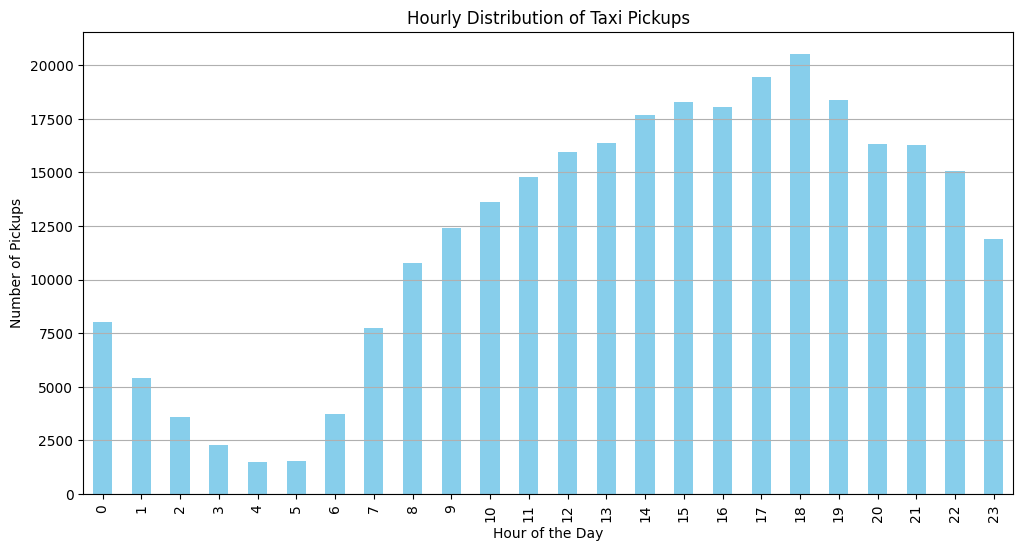

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find and show the hourly trends in taxi pickups
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df2['hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df2['month'] = df2['tpep_pickup_datetime'].dt.month

# Plotting hourly trends in taxi pickups
hourly_trends = df2['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_trends.plot(kind='bar', color='skyblue')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images.png')



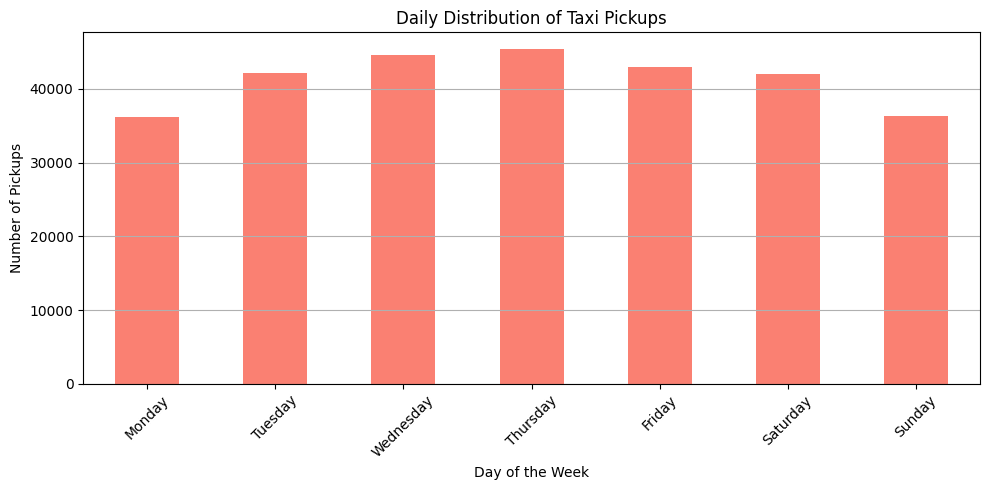

<Figure size 640x480 with 0 Axes>

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the day of the week
df2['day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate pickups per day of the week
daily_trends = df2['day_of_week'].value_counts().sort_index()

# Define weekday names for better plotting
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the daily trends
plt.figure(figsize=(10, 5))
daily_trends.plot(kind='bar', color='salmon')
plt.title('Daily Distribution of Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=weekday_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images.png')


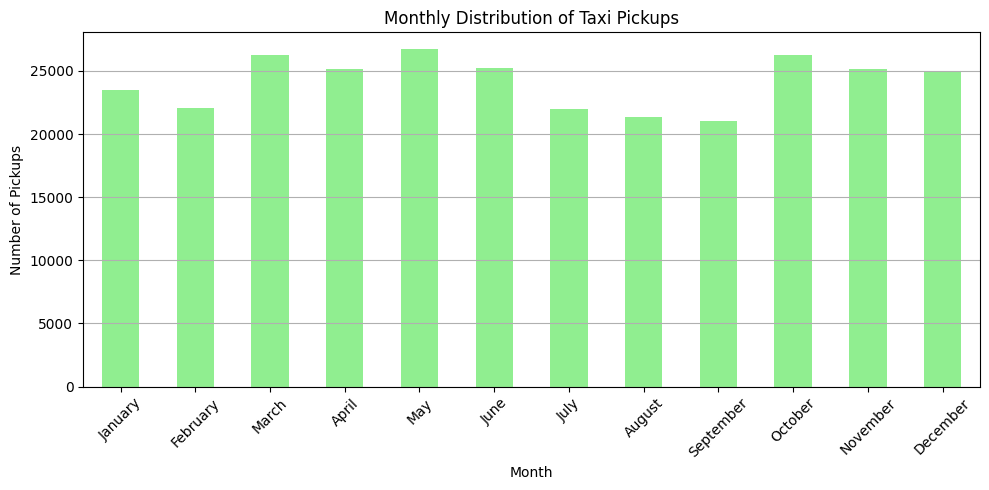

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show the monthly trends in pickups
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the month
df2['month'] = df2['tpep_pickup_datetime'].dt.month

# Calculate pickups per month
monthly_trends = df2['month'].value_counts().sort_index()

# Define month names for better plotting
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the monthly trends
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='bar', color='lightgreen')
plt.title('Monthly Distribution of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images.png')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 289725 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               289725 non-null  int64         
 1   tpep_pickup_datetime   289725 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  289725 non-null  object        
 3   passenger_count        289725 non-null  int64         
 4   trip_distance          289725 non-null  float64       
 5   RatecodeID             289725 non-null  float64       
 6   store_and_fwd_flag     289725 non-null  object        
 7   PULocationID           289725 non-null  int64         
 8   DOLocationID           289725 non-null  int64         
 9   payment_type           289725 non-null  int64         
 10  fare_amount            289725 non-null  float64       
 11  extra                  289725 non-null  float64       
 12  mta_tax                289725 non-null  float64  

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
mask = (
    (df2['trip_distance'] == 0)|
    (df2['fare_amount'] <= 0) |
    (df2['tip_amount'] <= 0) |
    (df2['total_amount'] <= 0)
)

zero_negative_rows = df2[mask]
zero_negative_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1,18.11,2.0,N,132,107,2,...,0.5,0.0,6.94,1.0,82.69,2.5,1.75,14,5,9
5,1,2023-04-26 23:46:30,2023-04-26 23:48:04,1,0.60,1.0,N,141,141,2,...,0.5,0.0,0.00,1.0,10.10,2.5,0.00,23,2,4
6,1,2023-09-28 18:33:42,2023-09-28 18:42:02,2,1.70,1.0,N,236,142,2,...,0.5,0.0,0.00,1.0,17.20,2.5,0.00,18,3,9
9,2,2023-06-18 22:25:55,2023-06-18 23:11:20,1,18.11,2.0,N,132,186,1,...,0.5,0.0,6.55,1.0,82.30,2.5,1.75,22,6,6
10,1,2023-10-08 15:17:31,2023-10-08 15:22:30,1,0.90,1.0,N,238,151,2,...,0.5,0.0,0.00,1.0,11.90,2.5,0.00,15,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299966,2,2023-06-21 13:43:10,2023-06-21 13:47:13,1,0.58,1.0,N,239,239,1,...,0.5,0.0,0.00,1.0,9.80,2.5,0.00,13,2,6
299973,2,2023-04-06 11:40:07,2023-04-06 11:49:06,1,0.87,1.0,N,161,48,2,...,0.5,0.0,0.00,1.0,13.30,2.5,0.00,11,3,4
299974,2,2023-06-30 16:39:50,2023-06-30 17:06:21,1,4.47,1.0,N,229,144,2,...,0.5,0.0,0.00,1.0,33.30,2.5,0.00,16,4,6
299983,2,2023-08-28 14:19:16,2023-08-28 14:40:10,4,6.62,1.0,N,13,230,1,...,0.5,0.0,0.00,1.0,35.00,2.5,0.00,14,0,8


In [ ]:
df2.loc[(df2['trip_distance'] == 0) & (df2['PULocationID'] == df2['DOLocationID'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
33,2,2023-12-29 14:11:38,2023-12-29 14:11:46,1,0.0,1.0,N,193,193,3,...,0.5,0.0,0.0,1.0,4.50,0.0,0.00,14,4,12
42,1,2023-04-28 11:43:27,2023-04-28 11:52:03,1,0.0,1.0,N,145,145,2,...,0.5,0.0,0.0,1.0,10.10,0.0,0.00,11,4,4
73,2,2023-10-15 14:19:51,2023-10-15 14:20:04,1,0.0,1.0,N,209,209,1,...,0.5,30.0,0.0,1.0,37.00,2.5,0.00,14,6,10
413,2,2023-07-11 20:59:25,2023-07-11 20:59:30,2,0.0,2.0,N,264,264,2,...,0.5,0.0,0.0,1.0,71.50,0.0,0.00,20,1,7
500,1,2023-12-20 15:41:50,2023-12-20 15:42:11,1,0.0,2.0,N,193,193,2,...,0.5,0.0,0.0,1.0,71.50,0.0,0.00,15,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298806,2,2023-01-20 21:00:24,2023-01-20 21:00:31,1,0.0,2.0,N,137,137,3,...,0.5,0.0,0.0,1.0,74.00,2.5,0.00,21,4,1
298948,2,2023-06-18 02:12:39,2023-06-18 02:13:28,1,0.0,3.0,N,187,187,1,...,0.0,0.0,0.0,1.0,25.00,0.0,0.00,2,6,6
299065,2,2023-04-02 23:15:24,2023-04-02 23:15:33,1,0.0,1.0,N,132,132,2,...,0.5,0.0,0.0,1.0,6.75,0.0,1.25,23,6,4
299150,2,2023-12-20 19:46:39,2023-12-20 19:46:49,2,0.0,2.0,N,263,263,2,...,0.5,0.0,0.0,1.0,79.00,2.5,0.00,19,2,12


In [ ]:
df2.loc[df2['fare_amount']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
1063,1,2023-02-07 10:21:51,2023-02-07 10:22:16,1,6.8,1.0,N,132,132,2,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,10,1,2
9845,1,2023-08-24 22:51:53,2023-08-24 23:44:00,1,30.3,5.0,N,132,265,3,...,0.0,0.0,6.94,1.0,7.94,0.0,0.0,22,3,8
12767,2,2023-09-19 17:17:24,2023-09-19 17:17:46,1,0.0,1.0,N,193,193,1,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,17,1,9
12842,1,2023-06-19 14:29:09,2023-06-19 14:42:01,1,2.8,5.0,N,163,145,4,...,0.0,0.0,0.00,1.0,1.00,0.0,0.0,14,0,6
14296,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1,0.0,2.0,N,132,132,2,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278627,1,2023-05-19 13:43:17,2023-05-19 13:54:03,1,1.5,1.0,N,238,75,4,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,13,4,5
278848,1,2023-08-02 14:28:40,2023-08-02 14:48:47,1,5.2,99.0,N,124,205,1,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,14,2,8
278967,2,2023-07-25 10:30:45,2023-07-25 10:31:07,1,0.0,1.0,N,7,7,1,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,10,1,7
282158,1,2023-11-06 16:01:22,2023-11-06 16:05:12,1,0.1,1.0,N,100,230,3,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,16,0,11


In [ ]:
df2.loc[(df2['fare_amount'] == 0.0) & (df2['trip_distance'] == 0.0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
12767,2,2023-09-19 17:17:24,2023-09-19 17:17:46,1,0.0,1.0,N,193,193,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,17,1,9
14296,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1,0.0,2.0,N,132,132,2,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,14,1,1
21507,1,2023-01-10 21:32:31,2023-01-10 21:33:07,1,0.0,4.0,N,164,164,3,...,0.5,0.00,0.0,1.0,5.00,2.5,0.00,21,1,1
23331,1,2023-01-31 14:18:45,2023-01-31 14:19:04,1,0.0,1.0,N,138,138,4,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,14,1,1
35335,1,2023-10-25 11:56:00,2023-10-25 11:56:32,1,0.0,99.0,N,54,54,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,11,2,10
40083,1,2023-09-08 17:14:25,2023-09-08 17:14:56,2,0.0,5.0,N,145,145,3,...,0.0,0.00,0.0,1.0,1.00,0.0,0.00,17,4,9
52352,1,2023-02-20 15:58:10,2023-02-20 15:59:12,1,0.0,1.0,N,145,145,2,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,15,0,2
56039,2,2023-07-01 11:54:34,2023-07-01 11:54:54,1,0.0,1.0,N,193,193,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,11,5,7
62261,2,2023-01-13 14:17:30,2023-01-13 14:17:45,1,0.0,1.0,N,260,260,2,...,0.5,0.00,0.0,1.0,1.50,0.0,0.00,14,4,1
66010,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3,0.0,2.0,N,74,74,2,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,18,5,9


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
df3=df2[df2[['fare_amount','tip_amount','total_amount','trip_distance']] != 0]
df3


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
0,NaN,NaT,NaN,NaN,5.53,NaN,NaN,NaN,NaN,NaN,...,NaN,8.37,NaN,NaN,50.22,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,18.11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,82.69,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,3.72,NaN,NaN,22.32,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,1.80,NaN,NaN,NaN,NaN,NaN,...,NaN,4.60,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,2.61,NaN,NaN,NaN,NaN,NaN,...,NaN,4.34,NaN,NaN,26.04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,NaN,NaT,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,4.00,NaN,NaN,21.50,NaN,NaN,NaN,NaN,NaN
299996,NaN,NaT,NaN,NaN,1.28,NaN,NaN,NaN,NaN,NaN,...,NaN,2.00,NaN,NaN,17.80,NaN,NaN,NaN,NaN,NaN
299997,NaN,NaT,NaN,NaN,2.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN
299998,NaN,NaT,NaN,NaN,2.46,NaN,NaN,NaN,NaN,NaN,...,NaN,5.00,NaN,NaN,24.60,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.loc[df2['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,day_of_week,month
33,2,2023-12-29 14:11:38,2023-12-29 14:11:46,1,0.0,1.0,N,193,193,3,...,0.5,0.00,0.0,1.0,4.50,0.0,0.00,14,4,12
42,1,2023-04-28 11:43:27,2023-04-28 11:52:03,1,0.0,1.0,N,145,145,2,...,0.5,0.00,0.0,1.0,10.10,0.0,0.00,11,4,4
57,2,2023-03-01 16:11:26,2023-03-01 16:11:28,1,0.0,5.0,N,161,264,1,...,0.0,4.80,0.0,1.0,20.80,0.0,0.00,16,2,3
73,2,2023-10-15 14:19:51,2023-10-15 14:20:04,1,0.0,1.0,N,209,209,1,...,0.5,30.00,0.0,1.0,37.00,2.5,0.00,14,6,10
268,1,2023-04-14 05:15:47,2023-04-14 06:08:51,1,0.0,1.0,N,91,230,1,...,0.5,0.00,0.0,1.0,47.00,0.0,0.00,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299065,2,2023-04-02 23:15:24,2023-04-02 23:15:33,1,0.0,1.0,N,132,132,2,...,0.5,0.00,0.0,1.0,6.75,0.0,1.25,23,6,4
299150,2,2023-12-20 19:46:39,2023-12-20 19:46:49,2,0.0,2.0,N,263,263,2,...,0.5,0.00,0.0,1.0,79.00,2.5,0.00,19,2,12
299474,2,2023-05-03 20:19:18,2023-05-03 20:52:39,1,0.0,1.0,N,170,181,1,...,0.5,6.22,0.0,1.0,37.32,2.5,0.00,20,2,5
299645,2,2023-10-03 15:39:48,2023-10-03 15:53:06,1,0.0,1.0,N,75,166,1,...,0.5,2.50,0.0,1.0,16.10,0.0,0.00,15,1,10


In [ ]:
df2['trip_distance'].describe()


,trip_distance
count,289725.000000
mean,3.442465
std,4.536658
min,0.000000
25%,1.060000
50%,1.790000
75%,3.380000
max,204.860000


In [ ]:
df1.trip_distance.replace(0,1.83)

,trip_distance
0,5.53
1,18.11
2,1.54
3,1.80
4,2.61
...,...
299995,1.00
299996,1.28
299997,2.69
299998,2.46


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

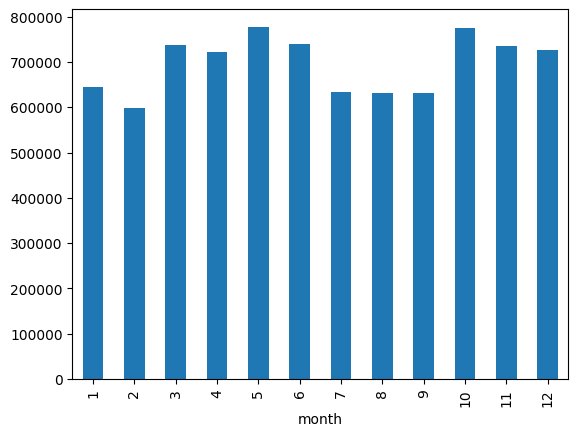

In [ ]:
# Group data by month and analyse monthly revenue


df2.groupby('month')['total_amount'].sum().plot.bar()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Proportion of revenue by quarter (%):
quarter
2023Q1    23.723237
2023Q2    26.817260
2023Q3    22.696099
2023Q4    26.763404
Freq: Q-DEC, Name: total_amount, dtype: float64


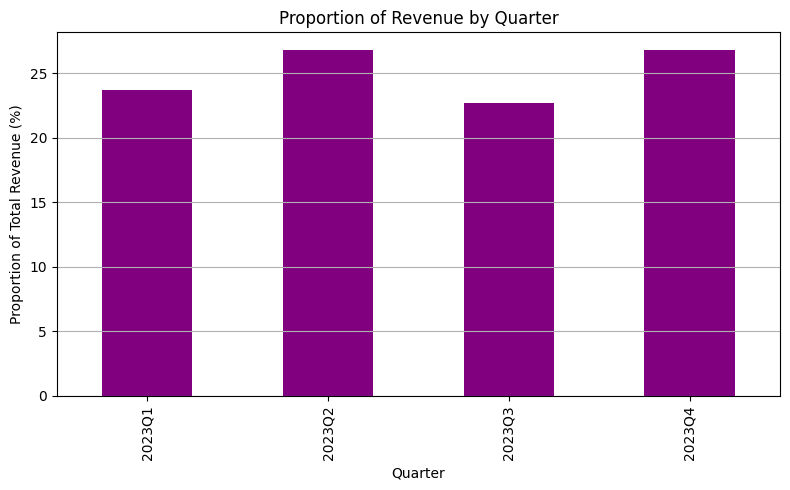

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate proportion of each quarter
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the quarter
df2['quarter'] = df2['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and calculate total quarterly revenue
quarterly_revenue = df2.groupby('quarter')['total_amount'].sum()

# Calculate the total revenue for all quarters
total_revenue = quarterly_revenue.sum()

# Calculate the proportion of each quarter
quarterly_proportion = (quarterly_revenue / total_revenue) * 100

# Display the proportion of each quarter
print("Proportion of revenue by quarter (%):")
print(quarterly_proportion)

plt.figure(figsize=(8, 5))
quarterly_proportion.plot(kind='bar', color='purple')
plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Data overview before analysis:
       trip_distance    fare_amount
count  289725.000000  289725.000000
mean        3.442465      19.720719
std         4.536658      18.242888
min         0.000000       0.000000
25%         1.060000       9.300000
50%         1.790000      13.500000
75%         3.380000      21.900000
max       204.860000    1375.000000


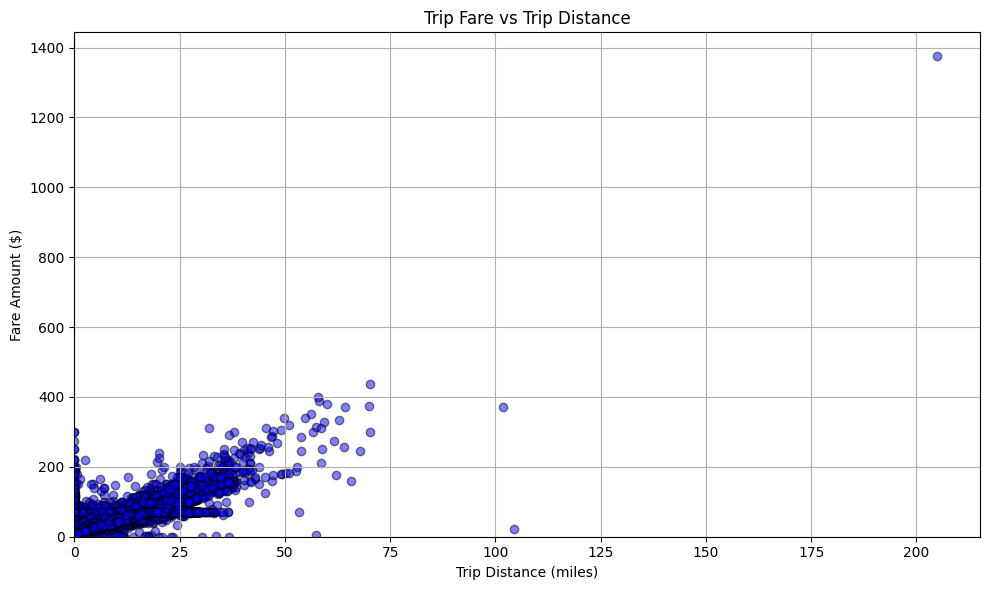

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show how trip fare is affected by distance
print("Data overview before analysis:")
print(df2[['trip_distance', 'fare_amount']].describe())

# Plotting the relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df2['trip_distance'], df2['fare_amount'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(left=0)  # Optional, to start the x-axis at 0
plt.ylim(bottom=0)  # Optional, to start the y-axis at 0
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between Fare Amount and Trip Duration: 0.26


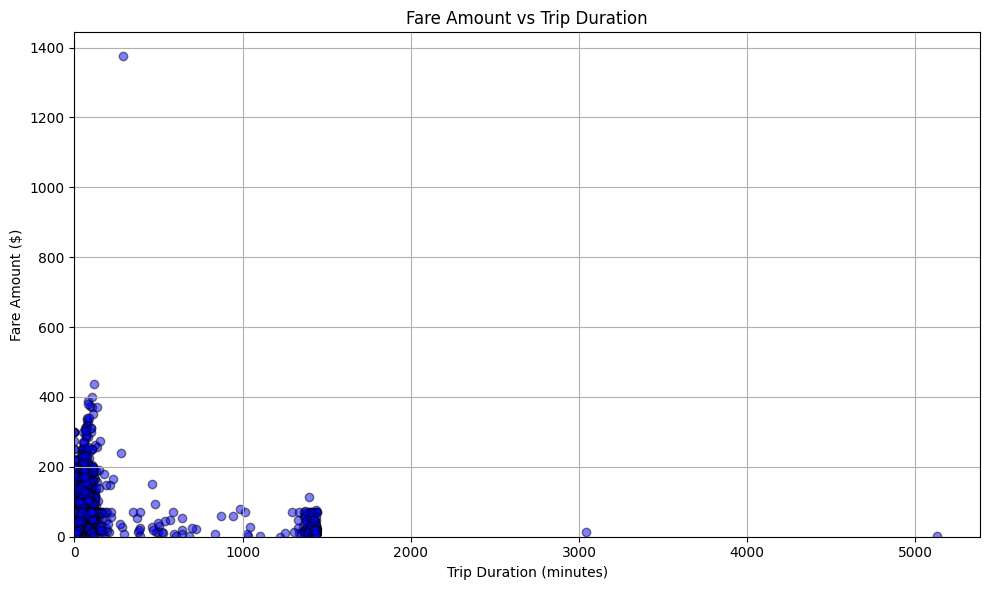

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between fare and trip duration
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Calculate the correlation between fare_amount and trip_duration
correlation = df2[['fare_amount', 'trip_duration']].corr().iloc[0, 1]

# Print correlation coefficient
print(f"Correlation between Fare Amount and Trip Duration: {correlation:.2f}")

# Visualize the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['trip_duration'], df2['fare_amount'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.xlim(left=0)  # Optional: Start x-axis at 0
plt.ylim(bottom=0)  # Optional: Start y-axis at 0
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

Correlation between Fare Amount and Passenger Count: 0.05


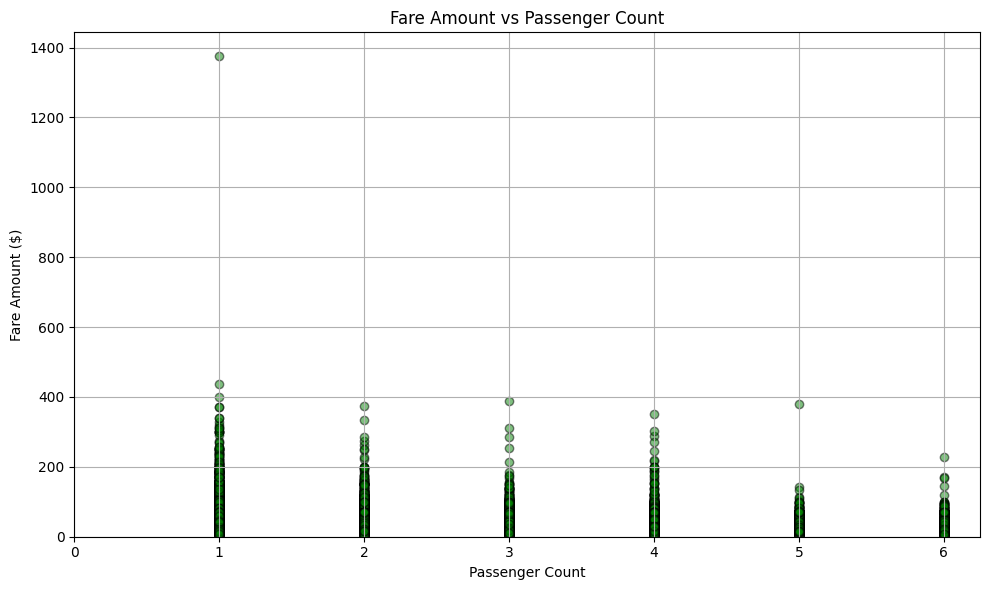

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between fare and number of passengers

correlation = df2[['fare_amount', 'passenger_count']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"Correlation between Fare Amount and Passenger Count: {correlation:.2f}")

# Visualize the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['passenger_count'], df2['fare_amount'], alpha=0.5, c='green', edgecolor='k')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.xlim(left=0)  # Optional: Begin x-axis at 0 for clarity in passenger count
plt.ylim(bottom=0)  # Optional: Begin y-axis at 0 for logical fare value display
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

Correlation between Tip Amount and Trip Distance: 0.58


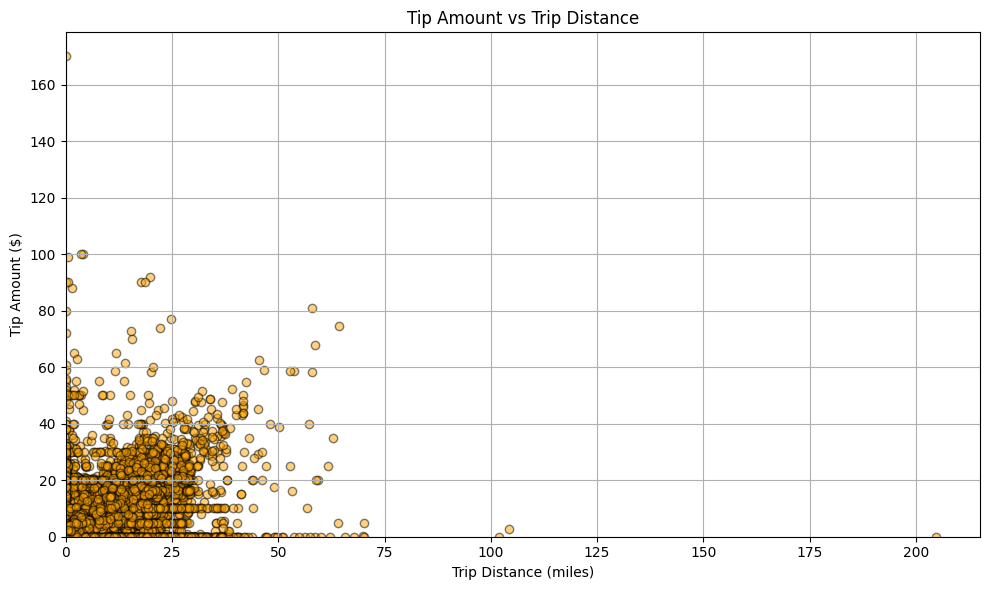

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show relationship between tip and trip distance
correlation = df2[['tip_amount', 'trip_distance']].corr().iloc[0, 1]

# Print the correlation coefficient
print(f"Correlation between Tip Amount and Trip Distance: {correlation:.2f}")

# Visualize the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['trip_distance'], df2['tip_amount'], alpha=0.5, c='orange', edgecolor='k')
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.xlim(left=0)  # Optional: Ensures logical display starting at 0
plt.ylim(bottom=0)  # Optional: Ensures logical display starting at 0
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

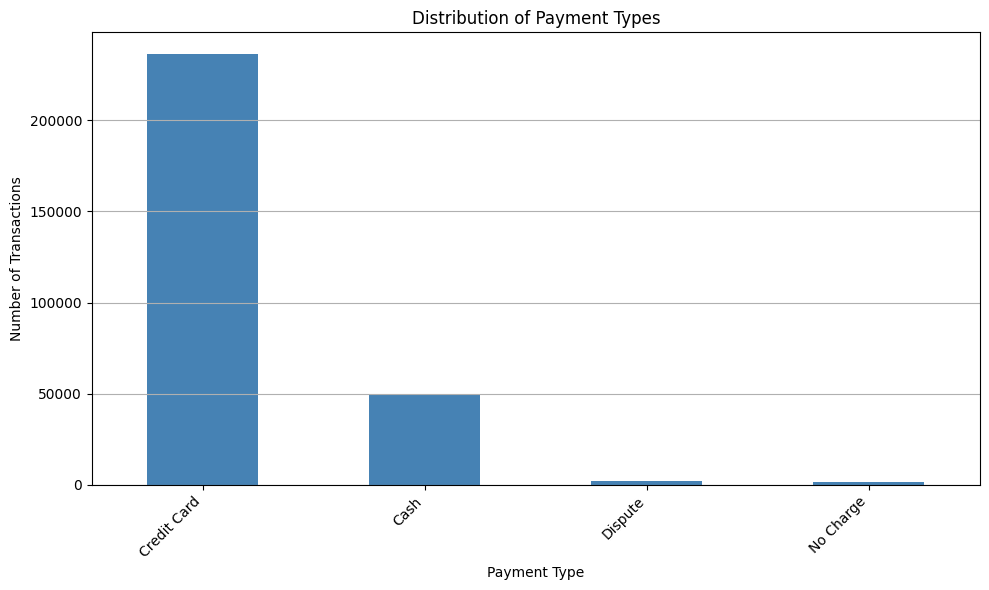

<Figure size 640x480 with 0 Axes>

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df2['payment_type'].value_counts()

# Define a mapping for the payment_type labels if needed
payment_type_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Replace payment type codes with meaningful labels if they exist
payment_type_counts.index = payment_type_counts.index.map(payment_type_labels)

# Plot the distribution of payment types
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()
plt.savefig(r'/content/drive/MyDrive/Python Files/EDA images')

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
 import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"/content/drive/MyDrive/Python Files/taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

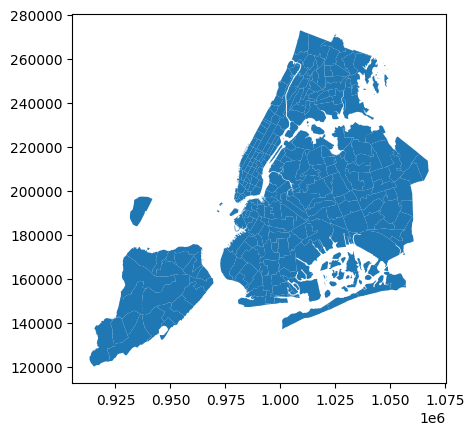

In [ ]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df4 = pd.merge(df2, zones, how='left', left_on='PULocationID', right_on='LocationID')

df4.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-06-25 22:34:24,2023-06-25 22:59:09,2,5.53,1.0,N,158,40,1,...,6,2023Q2,24.750000,158.0,0.054810,0.000186,Meatpacking/West Village West,158.0,Manhattan,"POLYGON ((982091.02 209596.704, 982318.344 209..."
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1,18.11,2.0,N,132,107,2,...,9,2023Q3,43.450000,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
2,2,2023-10-13 16:46:26,2023-10-13 16:59:05,1,1.54,1.0,N,140,142,1,...,10,2023Q4,12.650000,140.0,0.047584,0.000114,Lenox Hill East,140.0,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
3,1,2023-07-10 12:08:14,2023-07-10 12:17:15,1,1.80,1.0,N,239,75,1,...,7,2023Q3,9.016667,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
4,2,2023-11-08 15:38:53,2023-11-08 15:56:51,1,2.61,1.0,N,186,113,1,...,11,2023Q4,17.966667,186.0,0.024696,0.000037,Penn Station/Madison Sq West,186.0,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

Top 10 pickup locations by number of trips:
PULocationID
132    15260
237    13702
161    13689
236    12279
162    10314
138    10212
186    10020
142     9632
230     9544
170     8648
dtype: int64


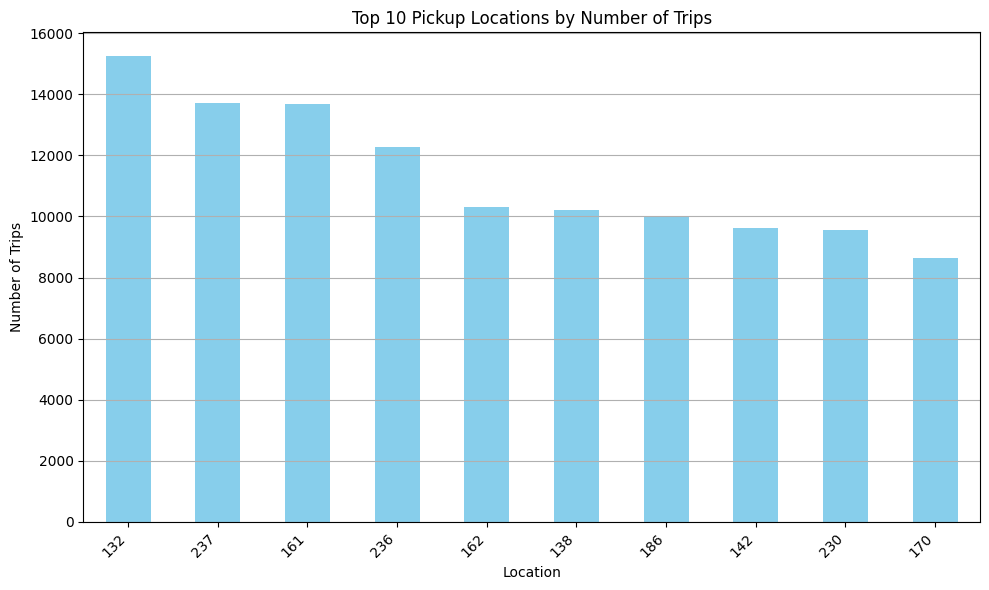

In [ ]:
# Group data by location and calculate the number of trips
trips_by_location = df4.groupby('PULocationID').size()

# Sort values to see the most and least active locations
trips_by_location_sorted = trips_by_location.sort_values(ascending=False)

# Display the top 10 locations
print("Top 10 pickup locations by number of trips:")
print(trips_by_location_sorted.head(10))

# Optionally, visualize the distribution
trips_by_location_sorted.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Pickup Locations by Number of Trips')
plt.xlabel('Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  trip_count_x  PULocationID_y  trip_count_y  PULocationID  \
0             1.0          37.0      

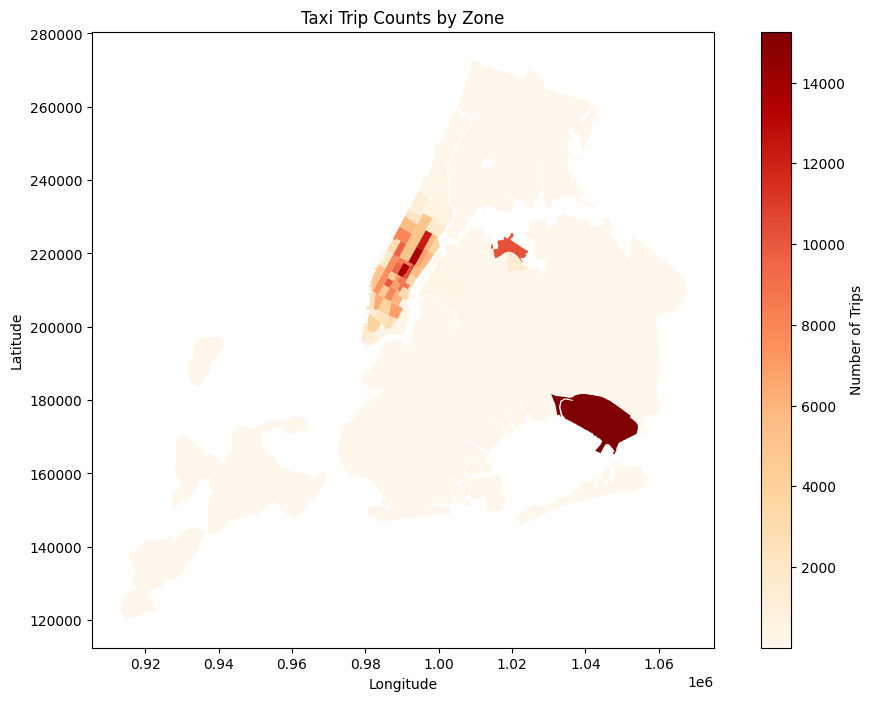

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
trips_by_location = df4.groupby('PULocationID').size().reset_index(name='trip_count')

# Load or prepare zones GeoDataFrame
# Example loading method (you can adjust based on your file source and format)
# zones_gdf = gpd.read_file('path_to_your_zone_shapefile.shp')

# Merge trip counts with zones GeoDataFrame on LocationID
zones = zones.merge(trips_by_location, how='left', left_on='LocationID', right_on='PULocationID')

# Verify the merge by displaying the top rows
print(zones.head())

# Optionally plot the zones with trip counts
zones.plot(column='trip_count', cmap='OrRd', legend=True,
               legend_kwds={'label': "Number of Trips"},
               figsize=(12, 8))
plt.title('Taxi Trip Counts by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

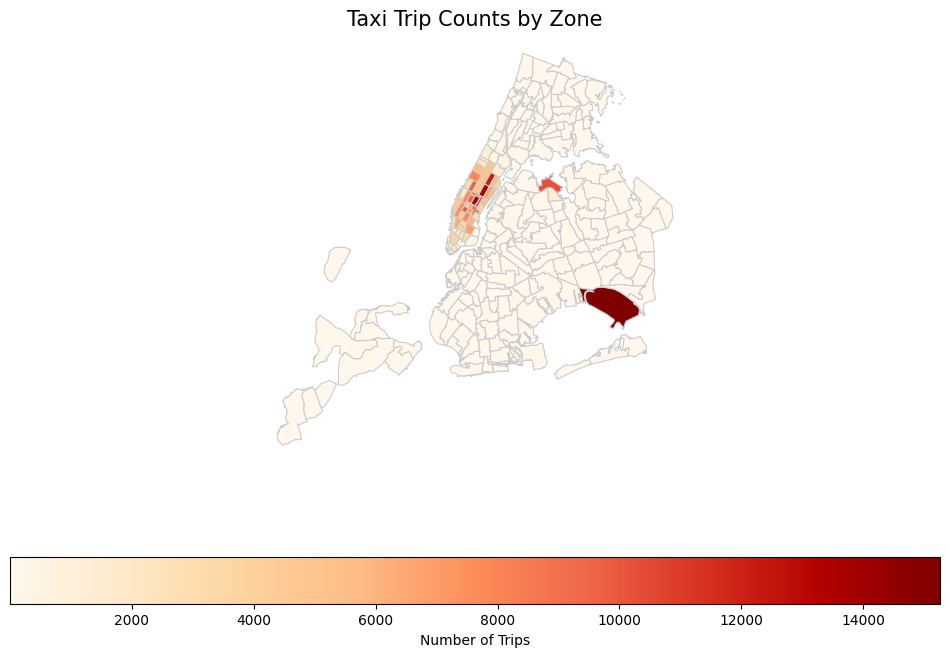

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the GeoDataFrame
zones.plot(column='trip_count',
               cmap='OrRd',
               linewidth=0.8,
               ax=ax,
               edgecolor='0.8',
               legend=True,
               legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

# Set title and axis labels
ax.set_title('Taxi Trip Counts by Zone', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



# Plot the map and display it
ax.set_axis_off()
plt.axis('equal')
# Display the map
plt.show()


Top 10 Zones by Number of Trips:
     LocationID  trip_count                          zone
131         132     15260.0                   JFK Airport
236         237     13702.0         Upper East Side South
160         161     13689.0                Midtown Center
235         236     12279.0         Upper East Side North
161         162     10314.0                  Midtown East
137         138     10212.0             LaGuardia Airport
185         186     10020.0  Penn Station/Madison Sq West
141         142      9632.0           Lincoln Square East
229         230      9544.0     Times Sq/Theatre District
169         170      8648.0                   Murray Hill


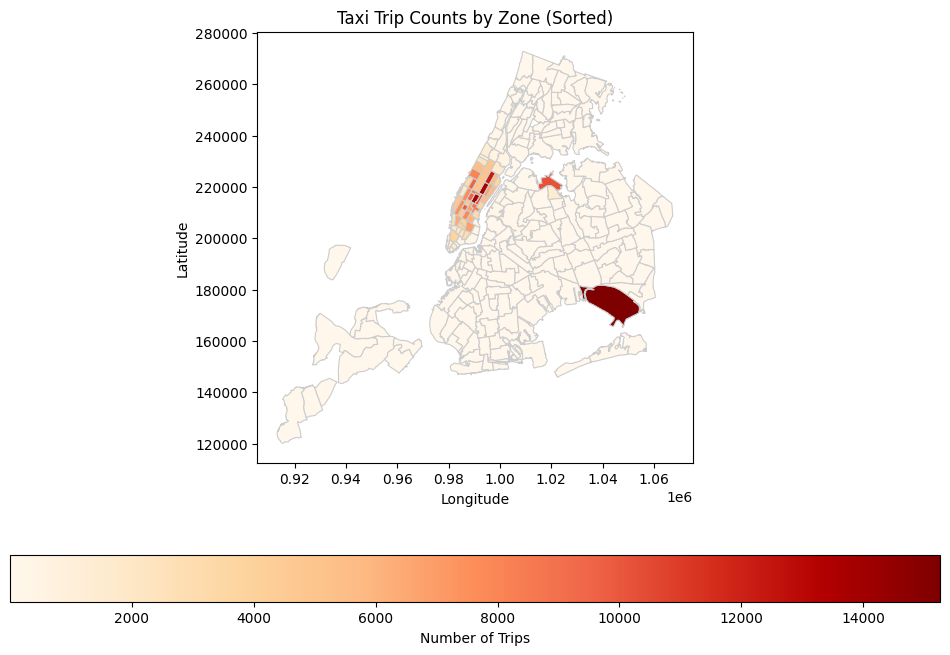

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones_gdf = zones.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones with the most trips
print("Top 10 Zones by Number of Trips:")
print(sorted_zones_gdf[['LocationID', 'trip_count', 'zone']].head(10))

# Additionally, display the sorted GeoDataFrame map (Optional)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sorted_zones_gdf.plot(column='trip_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                      legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
ax.set_title('Taxi Trip Counts by Zone (Sorted)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df4 = df4[(df4['trip_duration'] > 0) & (df4['trip_distance'] > 0)]
df4 = df4[(df4['trip_duration'] > 0) & (df4['trip_duration'] < 10800)]  # 10800 seconds = 3 hours
df4['speed'] = df4['trip_distance'] / (df4['trip_duration'] / 3600)

route_speeds = df4.groupby(['LocationID', 'DOLocationID', 'hour'])['speed'].mean().reset_index()
slowest_routes_per_hour = route_speeds.loc[route_speeds.groupby('hour')['speed'].idxmin()]

print(slowest_routes_per_hour)

       LocationID  DOLocationID  hour       speed
61742       263.0            68     0   11.643123
12687        90.0            33     1   11.473966
36436       161.0           264     2    6.153217
57903       246.0           143     3    7.307252
37250       162.0           162     4    3.886799
9750         78.0            78     5  152.470588
19711       131.0            25     6   13.779904
13793        91.0            65     7   46.685879
5363         50.0            43     8    3.571495
17506       113.0           244     9    5.084347
44582       209.0           132    10    5.139798
35001       159.0           159    11   10.480349
33022       148.0           232    12    3.094409
3831         48.0             7    13    2.202257
27003       140.0           108    14   16.170691
46355       226.0           226    15    0.771429
44309       194.0           194    16    2.934783
57262       243.0           264    17    0.466338
42455       175.0           218    18   40.780365


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

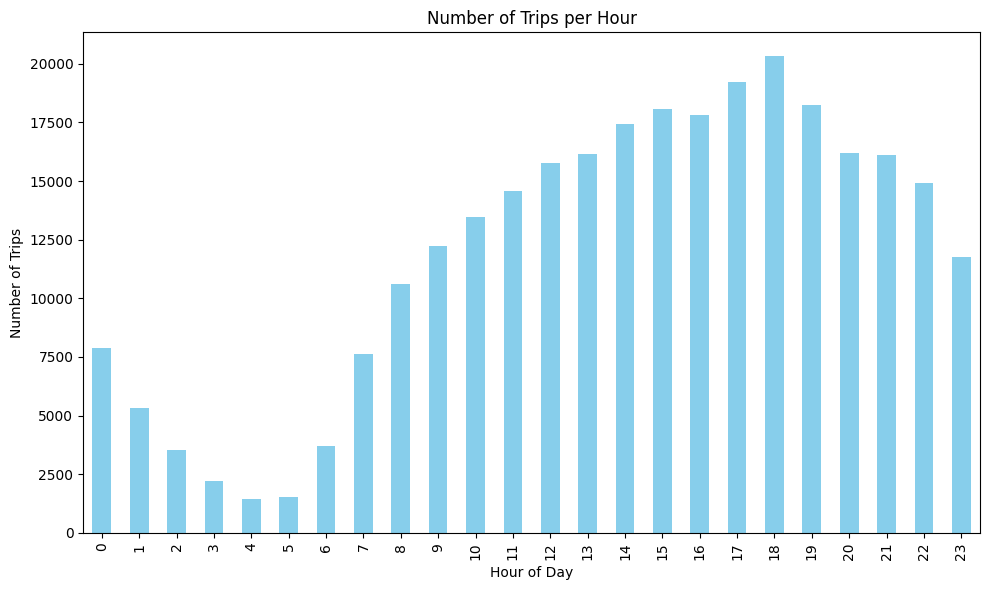

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df4.groupby('hour').size()

trips_per_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.savefig(r'C:\Users\1311r\Downloads\houranalysis.png')
plt.show()



In [ ]:
busiest_hour = trips_per_hour.idxmax()
print(f"Busiest Hour: {busiest_hour} with {trips_per_hour.max()} trips")

Busiest Hour: 18 with 20321 trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

df2['hour'] = df2['tpep_pickup_datetime'].dt.hour
hourly_trip_counts = df2['hour'].value_counts().sort_index()
top_five_busiest_hours = hourly_trip_counts.sort_values(ascending=False).head(5)

# Print the result
print("Number of trips in the five busiest hours:")
print(top_five_busiest_hours)



Number of trips in the five busiest hours:
hour
18    20526
17    19448
19    18396
15    18287
16    18057
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

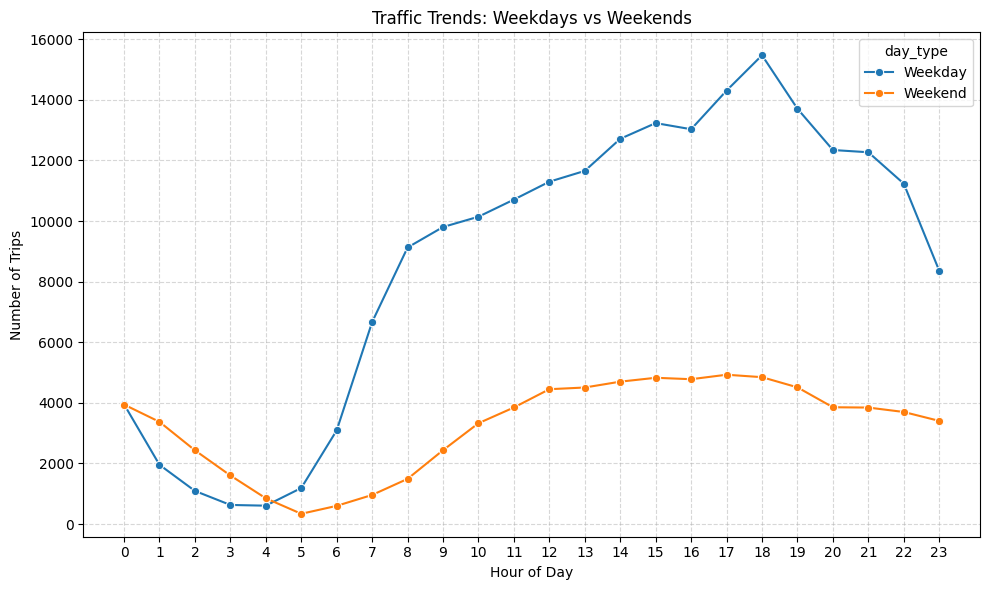

In [ ]:
# Compare traffic trends for the week days and weekends
df4['tpep_pickup_datetime'] = pd.to_datetime(df4['tpep_pickup_datetime'], errors='coerce')

df4['pickup_hour'] = df4['tpep_pickup_datetime'].dt.hour

traffic_trends = df4.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=traffic_trends, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
zone_mapping = df4.groupby('LocationID')['zone'].first().to_dict()
df4['pick_up_zone'] = df4['LocationID'].map(zone_mapping)


In [ ]:
pick_up_zone_hourly_counts = df4.groupby(['pickup_hour', 'pick_up_zone']).size().reset_index(name='count')

top_10_pickup_zones_by_hour = pick_up_zone_hourly_counts.groupby('pickup_hour').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

print(top_10_pickup_zones_by_hour)

     pickup_hour               pick_up_zone  count
0              0                JFK Airport    612
1              0               East Village    557
2              0               West Village    480
3              0               Clinton East    399
4              0    Greenwich Village South    322
..           ...                        ...    ...
235           23        Lincoln Square East    487
236           23             Midtown Center    465
237           23  Times Sq/Theatre District    464
238           23    Greenwich Village South    375
239           23              Midtown South    363

[240 rows x 3 columns]


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_mapping = df4.groupby('DOLocationID')['zone'].first().to_dict()
df4['drop_off_zone'] = df4['DOLocationID'].map(zone_mapping)



In [ ]:
drop_off_zone_counts = df4['drop_off_zone'].value_counts()
top_10_drop_off_zones = drop_off_zone_counts.nlargest(10)
print("Top 10 Drop-off Zones:")
print(top_10_drop_off_zones)

Top 10 Drop-off Zones:
drop_off_zone
Penn Station/Madison Sq West    25913
JFK Airport                     22613
Lenox Hill East                 20819
Clinton East                    15630
Upper East Side South           15043
Lenox Hill West                 13583
East Village                    11785
Times Sq/Theatre District       11455
Upper West Side South           11142
Union Sq                        10218
Name: count, dtype: int64


In [ ]:
pickup_counts = df4['pick_up_zone'].value_counts()
drop_off_counts = df4['drop_off_zone'].value_counts()
zone_ratios = pickup_counts.div(drop_off_counts).replace([np.inf, -np.inf], np.nan)
highest_ratios = zone_ratios.nlargest(10, keep='all')
lowest_ratios = zone_ratios[zone_ratios != 0].nsmallest(10, keep='all')

print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios)

print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)

10 Highest Pickup/Dropoff Ratios:
UN/Turtle Bay South              507.571429
Midtown South                    196.342857
Yorkville East                   169.272727
Little Italy/NoLiTa               66.868421
Sutton Place/Turtle Bay North     33.239521
Clinton Hill                      27.000000
Lincoln Square West               26.964602
Lower East Side                   19.307190
East Harlem North                 12.046512
East Elmhurst                     10.722222
Name: count, dtype: float64

10 Lowest Pickup/Dropoff Ratios:
Queensboro Hill                     0.021053
Bay Ridge                           0.062016
Flatbush/Ditmas Park                0.088136
Seaport                             0.128247
West Farms/Bronx River              0.157895
Crotona Park East                   0.166667
East Concourse/Concourse Village    0.170213
Bedford Park                        0.177778
Coney Island                        0.179104
Hudson Sq                           0.189377
Name: count, d

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_data = df4[(df4['hour'] >= 23) | (df4['hour'] <= 5)]
night_pickup_counts = night_hours_data['pick_up_zone'].value_counts()
night_dropoff_counts = night_hours_data['drop_off_zone'].value_counts()
top_pickup_zones = night_pickup_counts.nlargest(10)
top_dropoff_zones = night_dropoff_counts.nlargest(10)
print("Top 10 Pickup Zones during Night Hours:")
print(top_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_dropoff_zones)


Top 10 Pickup Zones during Night Hours:
pick_up_zone
East Village                    2499
JFK Airport                     2302
West Village                    1948
Clinton East                    1666
Lower East Side                 1576
Greenwich Village South         1367
Times Sq/Theatre District       1237
Penn Station/Madison Sq West    1051
Midtown South                    952
LaGuardia Airport                932
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours:
drop_off_zone
JFK Airport                     3744
Penn Station/Madison Sq West    2882
LaGuardia Airport               1595
Lenox Hill West                 1585
East Village                    1436
Union Sq                        1400
TriBeCa/Civic Center            1394
Gramercy                        1294
Lenox Hill East                 1252
Times Sq/Theatre District       1197
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
nighttime_hours = [23, 0, 1, 2, 3, 4, 5]
daytime_hours = list(range(6,23))
nighttime_data = df4[df4['hour'].isin(nighttime_hours)]
daytime_data = df4[df4['hour'].isin(daytime_hours)]
nighttime_revenue = nighttime_data['total_amount'].sum()
daytime_revenue = daytime_data['total_amount'].sum()
total_revenue = nighttime_revenue + daytime_revenue
nighttime_share = (nighttime_revenue / total_revenue) * 100
daytime_share = (daytime_revenue / total_revenue) * 100

print("Revenue Share:")
print(f"Nighttime: {nighttime_share:.2f}%")
print(f"Daytime: {daytime_share:.2f}%")


Revenue Share:
Nighttime: 11.98%
Daytime: 88.02%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
filtered_df2 = df4[(df4['trip_distance'] > 0) & (df4['passenger_count'] > 0)].copy()
filtered_df2['fare_per_mile'] = filtered_df2['fare_amount']/filtered_df2['trip_distance']
filtered_df2['fare_per_mile_per_passenger'] = filtered_df2['fare_per_mile']/ filtered_df2['passenger_count']
average_fare_per_mile_per_passenger = filtered_df2.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print('Average Fare Per Mile Per Passenger:')
print(average_fare_per_mile_per_passenger)




Average Fare Per Mile Per Passenger:
passenger_count
1    10.826774
2     6.069099
3     3.035576
4     4.107325
5     1.982255
6     1.367500
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
average_fare_per_mile_per_hour = filtered_df2.groupby('hour')['fare_per_mile'].mean()
average_fare_per_mile_per_day = filtered_df2.groupby('day_of_week')['fare_per_mile'].mean()
print('Average Fare Per Mile Per Hour:' )
print(average_fare_per_mile_per_hour)
print('Average Fare Per Mile Per Day:')
print(average_fare_per_mile_per_day)


Average Fare Per Mile Per Hour:
hour
0      9.299488
1     11.026440
2      7.150099
3      7.269692
4     13.219987
5     10.052723
6     12.661774
7     10.287420
8     11.273034
9     11.840017
10    10.933556
11    11.445103
12    11.201664
13    12.138647
14    11.979463
15    13.504466
16    12.871202
17    11.011587
18    11.134321
19    11.987207
20     8.765573
21     8.422760
22    10.001264
23     9.369111
Name: fare_per_mile, dtype: float64
Average Fare Per Mile Per Day:
day_of_week
0    10.256772
1    11.425923
2    10.960218
3    10.721389
4    11.553170
5    10.552839
6    11.850972
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
average_fare_per_mile_per_hour_per_vendor = filtered_df2.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()
print("Average Fare per Mile by Vendor and Hour of the Day:")
print(average_fare_per_mile_per_hour_per_vendor)


Average Fare per Mile by Vendor and Hour of the Day:
    VendorID  hour  fare_per_mile
0          1     0       6.745721
1          1     1       7.465718
2          1     2       6.464945
3          1     3       6.283905
4          1     4       6.154206
5          1     5       6.308218
6          1     6       6.826162
7          1     7       7.272881
8          1     8       8.360355
9          1     9       8.659978
10         1    10       8.265316
11         1    11       8.845654
12         1    12       8.954919
13         1    13       8.622129
14         1    14       8.744885
15         1    15       8.555028
16         1    16       8.870262
17         1    17       8.679699
18         1    18       8.565419
19         1    19       8.029865
20         1    20       7.305010
21         1    21       7.146075
22         1    22       7.178368
23         1    23       7.004153
24         2     0      10.025161
25         2     1      12.062035
26         2     2       7.34

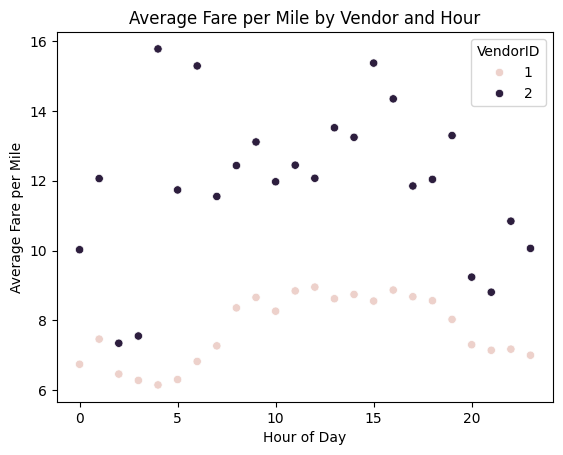

In [ ]:
sns.scatterplot(data=average_fare_per_mile_per_hour_per_vendor, x="hour", y="fare_per_mile", hue="VendorID")
plt.title("Average Fare per Mile by Vendor and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per mile per vendor per distance category:
   VendorID     distance_tiers  fare_per_mile
0         1       upto 2 miles       9.963129
1         1       2 to 5 miles       6.375806
2         1  more than 5 miles       4.409582
3         2       upto 2 miles      17.339453
4         2       2 to 5 miles       6.544415
5         2  more than 5 miles       4.506709


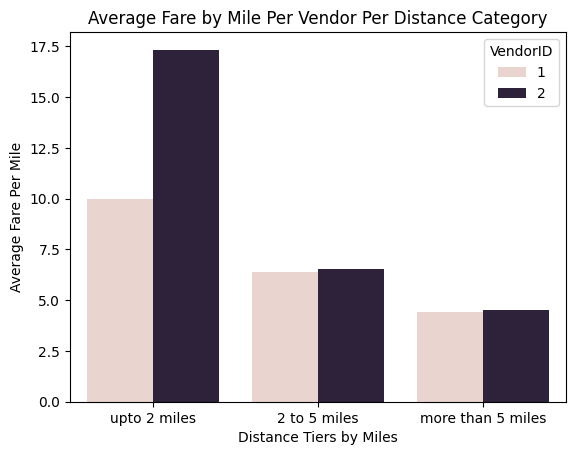

In [ ]:
# Defining distance tiers
filtered_df2['distance_tiers'] = pd.cut(filtered_df2['trip_distance'] , bins = [0, 2, 5, float('inf')] , labels = ['upto 2 miles' ,'2 to 5 miles','more than 5 miles'])
average_fare_by_vendor_tiers = filtered_df2.groupby(['VendorID', 'distance_tiers'], observed = False)['fare_per_mile'].mean().reset_index()
print('Average Fare per mile per vendor per distance category:')
print(average_fare_by_vendor_tiers)
sns.barplot(data = average_fare_by_vendor_tiers , x = 'distance_tiers' , y = 'fare_per_mile' , hue = 'VendorID')
plt.title('Average Fare by Mile Per Vendor Per Distance Category')
plt.xlabel('Distance Tiers by Miles')
plt.ylabel('Average Fare Per Mile')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

filtered_df2['tip_percentage'] = filtered_df2['tip_amount'] / filtered_df2['total_amount']*100
average_tip_percentage = filtered_df2.groupby(['trip_distance' , 'passenger_count' , 'tpep_pickup_datetime'])['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance, Passenger Count, and Pickup Time")
print(average_tip_percentage)

Average Tip Percentage by Distance, Passenger Count, and Pickup Time
        trip_distance  passenger_count tpep_pickup_datetime  tip_percentage
0                0.01                1  2023-01-03 23:35:07        5.760369
1                0.01                1  2023-01-04 07:15:49        0.000000
2                0.01                1  2023-01-07 19:34:51        0.000000
3                0.01                1  2023-01-08 19:13:03        0.000000
4                0.01                1  2023-01-08 20:57:27        0.000000
...               ...              ...                  ...             ...
286124          70.10                1  2023-08-16 08:16:11        1.633987
286125          70.22                1  2023-07-11 15:42:49        0.000000
286126         101.90                1  2023-12-03 16:42:58        0.000000
286127         104.30                1  2023-08-25 14:29:44        9.090909
286128         204.86                1  2023-08-18 15:28:08        0.000000

[286129 rows x 4 c

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
filtered_df2['tip_percentage'] = filtered_df2['tip_amount'] / filtered_df2['total_amount']*100
average_tip_percentage_hour = filtered_df2.groupby(['trip_distance' , 'passenger_count' , 'hour'])['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance, Passenger Count, and Hour")
print(average_tip_percentage_hour)

Average Tip Percentage by Distance, Passenger Count, and Hour
       trip_distance  passenger_count  hour  tip_percentage
0               0.01                1     0        0.000000
1               0.01                1     1        8.888889
2               0.01                1     3        0.000000
3               0.01                1     4        0.000000
4               0.01                1     6        2.732240
...              ...              ...   ...             ...
61156          70.10                1     8        1.633987
61157          70.22                1    15        0.000000
61158         101.90                1    16        0.000000
61159         104.30                1    14        9.090909
61160         204.86                1    15        0.000000

[61161 rows x 4 columns]


Number of trips with tip percentage < 10%: 74366
Number of trips with tip percentage > 25%: 128796


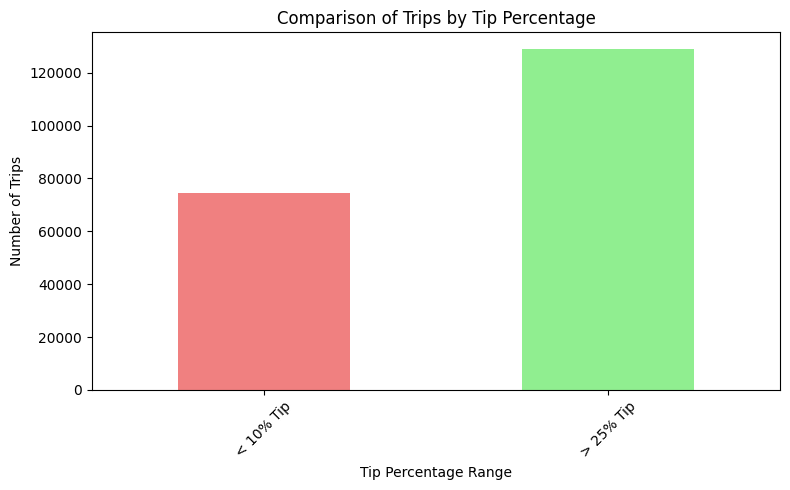

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df4['tip_percentage'] = (df4['tip_amount'] / df4['fare_amount']) * 100

low_tip_trips = df4[df4['tip_percentage'] < 10]
high_tip_trips = df4[df4['tip_percentage'] > 25]


low_tip_count = low_tip_trips.shape[0]
high_tip_count = high_tip_trips.shape[0]

# Print the results
print(f"Number of trips with tip percentage < 10%: {low_tip_count}")
print(f"Number of trips with tip percentage > 25%: {high_tip_count}")

# Optionally, visualize the comparison
plt.figure(figsize=(8, 5))
tip_counts = pd.Series({'< 10% Tip': low_tip_count, '> 25% Tip': high_tip_count})
tip_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Comparison of Trips by Tip Percentage')
plt.xlabel('Tip Percentage Range')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

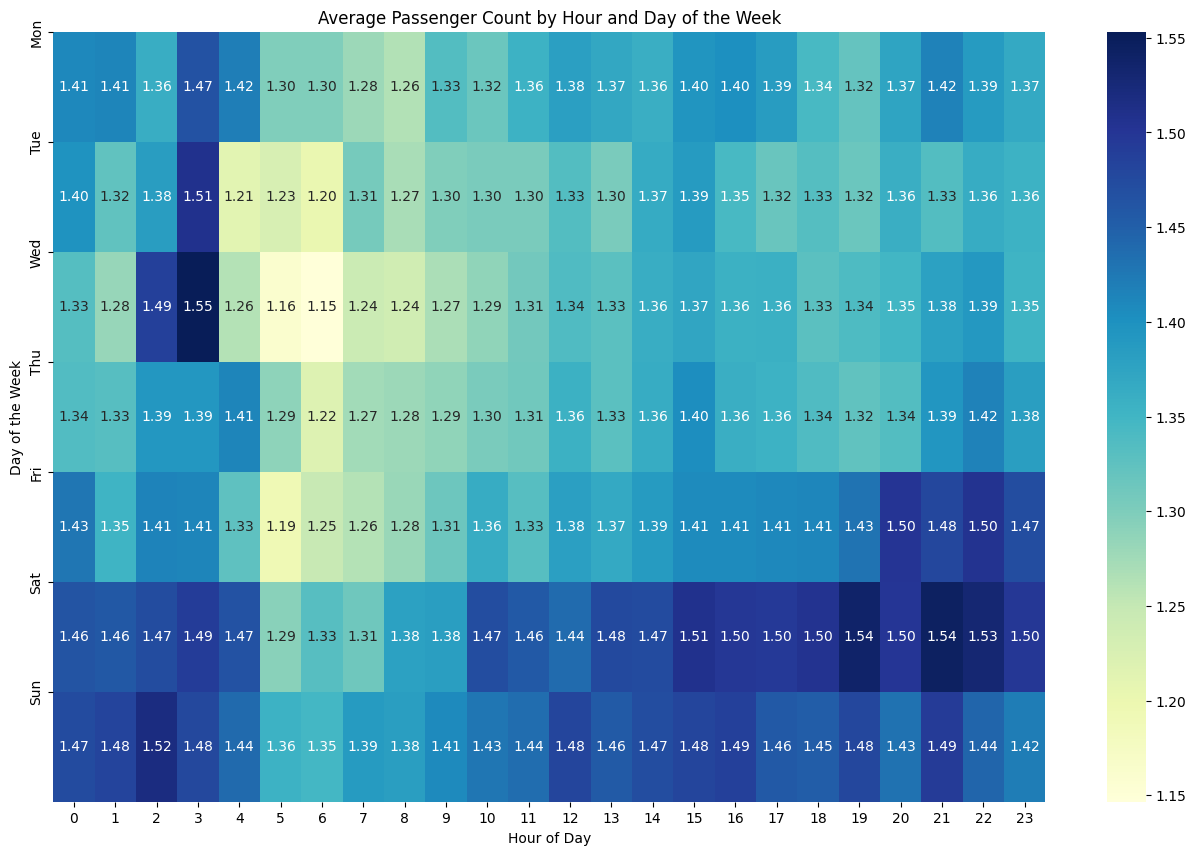

In [ ]:
# See how passenger count varies across hours and days
average_passenger_per_day_per_hour = filtered_df2.groupby(['hour','day_of_week'])['passenger_count'].mean().reset_index()
heatmap_data = average_passenger_per_day_per_hour.pivot_table(index="day_of_week", columns="hour", values="passenger_count")
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set y-axis labels
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
passenger_count_per_zone = filtered_df2.groupby('zone')['passenger_count'].count().reset_index()
print(passenger_count_per_zone)


                        zone  passenger_count
0    Allerton/Pelham Gardens                6
1              Alphabet City              317
2              Arden Heights                2
3    Arrochar/Fort Wadsworth                3
4                    Astoria              118
..                       ...              ...
233       Woodlawn/Wakefield                4
234                 Woodside               39
235       World Trade Center             1482
236           Yorkville East             3724
237           Yorkville West             5615

[238 rows x 2 columns]


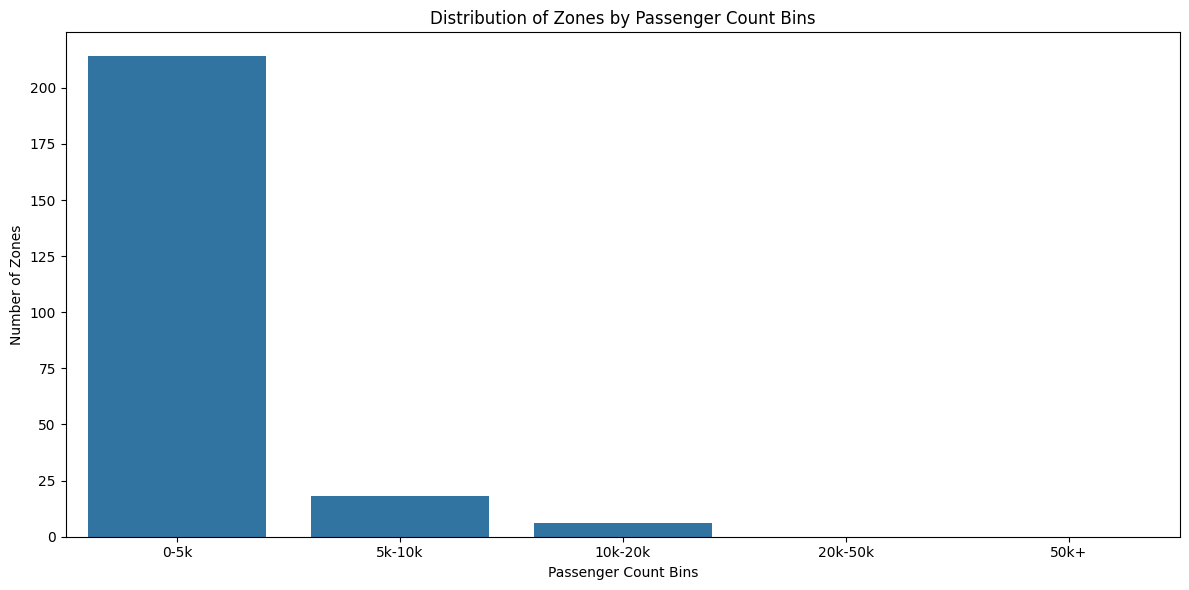

In [ ]:
passenger_count_per_zone['passenger_count_bins'] = pd.cut(passenger_count_per_zone['passenger_count'], bins=[0, 5000, 10000, 20000, 50000, float('inf')], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k+'])
binned_zones = passenger_count_per_zone.groupby('passenger_count_bins', observed = False)['zone'].count().reset_index(name='zone_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=binned_zones, x="passenger_count_bins", y="zone_count")
plt.title("Distribution of Zones by Passenger Count Bins")
plt.xlabel("Passenger Count Bins")
plt.ylabel("Number of Zones")
plt.tight_layout()
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
average_passengers_per_zone = filtered_df2.groupby('zone')['passenger_count'].mean().reset_index()
sorted_zones_gdf['average_passengers_per_zone'] =sorted_zones_gdf['zone'].map(average_passengers_per_zone.set_index('zone')['passenger_count'])



In [ ]:
sorted_zones_gdf['average_passengers_per_zone']

,average_passengers_per_zone
131,1.503373
236,1.343812
160,1.394093
235,1.342691
161,1.329137
...,...
175,NaN
198,NaN
220,NaN
244,NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
trips_with_extra_charges = filtered_df2[filtered_df2['extra'] > 0]
pick_up_zone_frequency = trips_with_extra_charges.groupby(['zone', 'LocationID'])['extra'].count().reset_index(name = 'extra_charge_frequency')
print('Frequency of Pickup Zones with Extra Charges:')
print(pick_up_zone_frequency.sort_values('extra_charge_frequency' , ascending = False).head(20))



Frequency of Pickup Zones with Extra Charges:
                             zone  LocationID  extra_charge_frequency
74              LaGuardia Airport       138.0                   10002
91                 Midtown Center       161.0                    8809
144         Upper East Side South       237.0                    7901
68                    JFK Airport       132.0                    7418
143         Upper East Side North       236.0                    6512
92                   Midtown East       162.0                    6360
137     Times Sq/Theatre District       230.0                    6279
77            Lincoln Square East       142.0                    6086
108  Penn Station/Madison Sq West       186.0                    5772
93                  Midtown North       163.0                    5388
40                   East Village        79.0                    5279
23                   Clinton East        48.0                    5232
99                    Murray Hill       170.

In [ ]:
trips_with_extra_charges = filtered_df2[filtered_df2['extra'] > 0]
drop_off_zone_frequency = trips_with_extra_charges.groupby(['zone', 'DOLocationID'])['extra'].count().reset_index(name = 'extra_charge_frequency')
print('Frequency of Dropoff Zones with Extra Charges:')
print(drop_off_zone_frequency.sort_values('extra_charge_frequency' , ascending = False).head(20))

Frequency of Dropoff Zones with Extra Charges:
                           zone  DOLocationID  extra_charge_frequency
6378      Upper East Side South           236                    1097
6252      Upper East Side North           237                     917
6379      Upper East Side South           237                     758
6251      Upper East Side North           236                     695
4276             Midtown Center           237                     577
3141          LaGuardia Airport           230                     566
4275             Midtown Center           236                     516
3520        Lincoln Square East           239                     515
6341      Upper East Side South           161                     455
3080          LaGuardia Airport           161                     424
6536      Upper West Side South           142                     409
3519        Lincoln Square East           238                     407
6573      Upper West Side South           2

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the EDA analysis of NYC taxi data, optimizing routing and dispatching involves strategically aligning resources with identified demand patterns and addressing inefficiencies. Key areas include focusing on high-demand zones like airports and business districts during peak times, where demand surges particularly in mornings and evenings. Dynamically adjust cab allocations for nightlife hotspots in areas like East and West Villages during weekends. Implement AI-driven routing to minimize idle time and improve efficiency, utilizing real-time traffic data for optimal routes. Encourage cab presence in residential areas during off-peak times with incentives, ensuring widespread coverage. Utilize predictive analytics for anticipatory adjustments, allowing dispatch to adapt to real-time events or demand anomalies. Additionally, leverage driver feedback for actionable insights into emerging traffic trends or inefficiencies, facilitating continuous improvement. Overall, these approaches enhance resource utilization, cut waiting times, and improve customer satisfaction, thereby strengthening operational efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Airports and Transit Hubs: Allocate more cabs to key locations such as JFK and LaGuardia airports, especially during peak flight times. These areas consistently show high trip volumes, particularly during early mornings and evenings when flights tend to have arrivals and departures.

Business Districts and Downtown Areas: Focus cab availability in areas like Midtown and the Financial District during weekday mornings and late afternoons to cater to commuter traffic. These areas experience peak demand during standard business hours and immediately afterward.

Nightlife Hotspots: In the evenings, especially on weekends, allocate cabs near popular nightlife venues—such as the East Village, West Village, and Times Square—to accommodate the surge in demand from late-night entertainment seekers.

Residential Areas During Off-Peak: Offer incentives for drivers to operate in residential zones during midday and late-night hours when demand is typically lower, ensuring coverage and reducing passenger wait times.

Seasonal and Event-Specific Deployment: Increase cab presence around areas hosting seasonal events or large gatherings (e.g., Central Park during summer festivals). Use historical data on event-related surges to preemptively adjust cab distributions.

Utilize Predictive Analytics: Leverage predictive analytics to anticipate demand in real-time, allowing for dynamic repositioning based on current conditions and upcoming events, influenced by both regular traffic patterns and anomalies.

By aligning cab positioning with these insights, you can optimize coverage, reduce passenger wait times, and maximize utilization during peak demand periods, enhancing both operational efficiency and customer satisfaction.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Dynamic Surge Pricing: Implement real-time surge pricing during high-demand periods, such as rush hours and special events. Use historical demand data to predict surges and adjust fares dynamically, ensuring higher rates when demand exceeds supply without pricing passengers out.

Time-Based Pricing: Introduce time-based fare adjustments for off-peak hours, encouraging ridership during typically slower times. Discounts during late night and midday can stimulate demand and improve cab utilization during quieter periods.

Zone-Based Pricing: Differentiate pricing based on zones, where high-demand areas like airports and business districts have slightly increased base fares. This approach compensates for the operational costs associated with longer wait times for pickups in these areas.

Incentives for Long-Distance Trips: Offer fare reductions for longer trips that cross boroughs or extend beyond usual distances. This could encourage passengers to opt for taxi services over alternatives, ensuring drivers have consistent, longer-duration trips.

Adaptable Tip Structures: Recognize patterns in tipping behavior and adjust suggested tip amounts in booking apps, encouraging fair tipping practices based on trip characteristics such as distance and service quality.

Customer Loyalty Programs: Implement loyalty programs offering discounts or credits to frequent riders, fostering repeat business and customer retention.

Transparent Pricing Communication: Clearly communicate changes in pricing strategies, such as surge pricing or new discounts, to ensure customers are informed and build trust.

By employing these strategies, taxi services can not only enhance their revenue during peak times but also sustain demand during off-peak periods through targeted pricing incentives, ultimately balancing profitability with customer satisfaction and market competitiveness.